## DATASET LOADING

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/vehicle-price-data/dataset.csv')

# Display the first few rows of the dataset
data.head()


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


## Checking for Missing Values

In [21]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


description        56
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
dtype: int64

## Handling Missing Values

In [22]:
# Define numeric and categorical columns
numeric_cols = [
    'price', 'cylinders', 'mileage', 
    'year',  # Assuming 'year' can also be numeric
]

categorical_cols = [
    'description', 'engine', 'fuel', 'transmission', 
    'trim', 'body', 'doors', 'exterior_color', 'interior_color', 'make', 'model'
]

# Filling missing values in numeric columns with the mean of the same 'make' and 'model'
for col in numeric_cols:
    data[col] = data.groupby(['make', 'model'])[col].transform(lambda x: x.fillna(x.mean()))

# For categorical columns, fill with mode of the same 'make' and 'model'
for col in categorical_cols:
    data[col] = data.groupby(['make', 'model'])[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify if there are any missing values left
missing_values_after = data.isnull().sum()
missing_values_after[missing_values_after > 0]


price          2
cylinders    104
mileage        8
dtype: int64

In [23]:
# Fill remaining missing values in numeric columns with overall mean
for col in numeric_cols:
    overall_mean = data[col].mean()
    data[col] = data[col].fillna(overall_mean)  # Assign back to the original DataFrame

# Verify if there are any missing values left
missing_values_after_fill = data.isnull().sum()
missing_values_after_fill[missing_values_after_fill > 0]


Series([], dtype: int64)

## Exploratory Data Analysis

In [7]:
# Summary statistics of the dataset
summary_stats = data.describe(include='all')
print(summary_stats)


                              name  \
count                         1002   
unique                         358   
top     2023 Dodge Durango Pursuit   
freq                            33   
mean                           NaN   
std                            NaN   
min                            NaN   
25%                            NaN   
50%                            NaN   
75%                            NaN   
max                            NaN   

                                              description  make   model  \
count                                                1002  1002    1002   
unique                                                762    28     153   
top     Number one Kia Dealer in all of North Carolina...  Jeep  Hornet   
freq                                                   17   194      65   
mean                                                  NaN   NaN     NaN   
std                                                   NaN   NaN     NaN   
min               

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


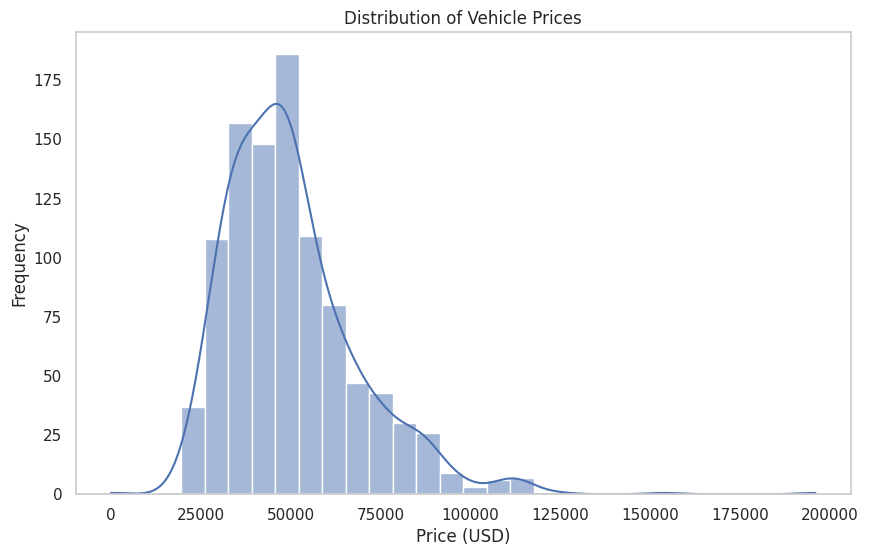

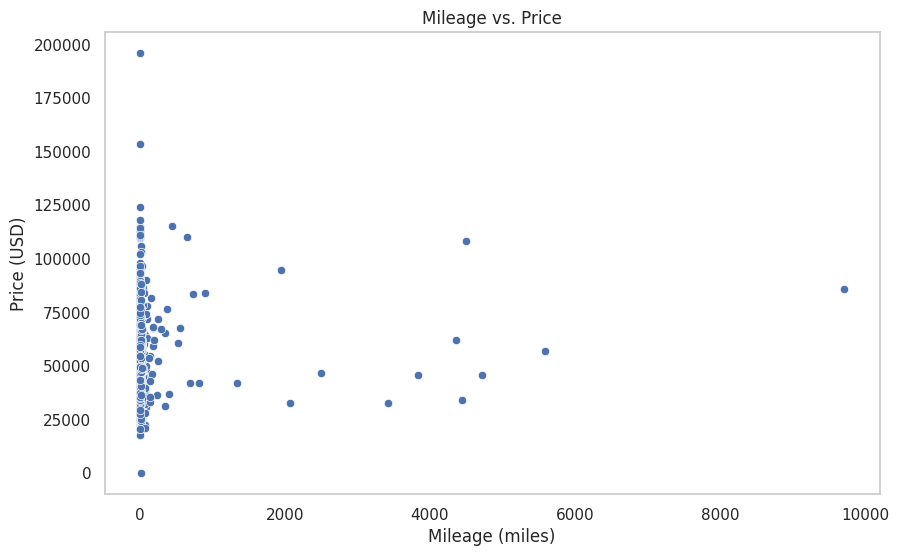

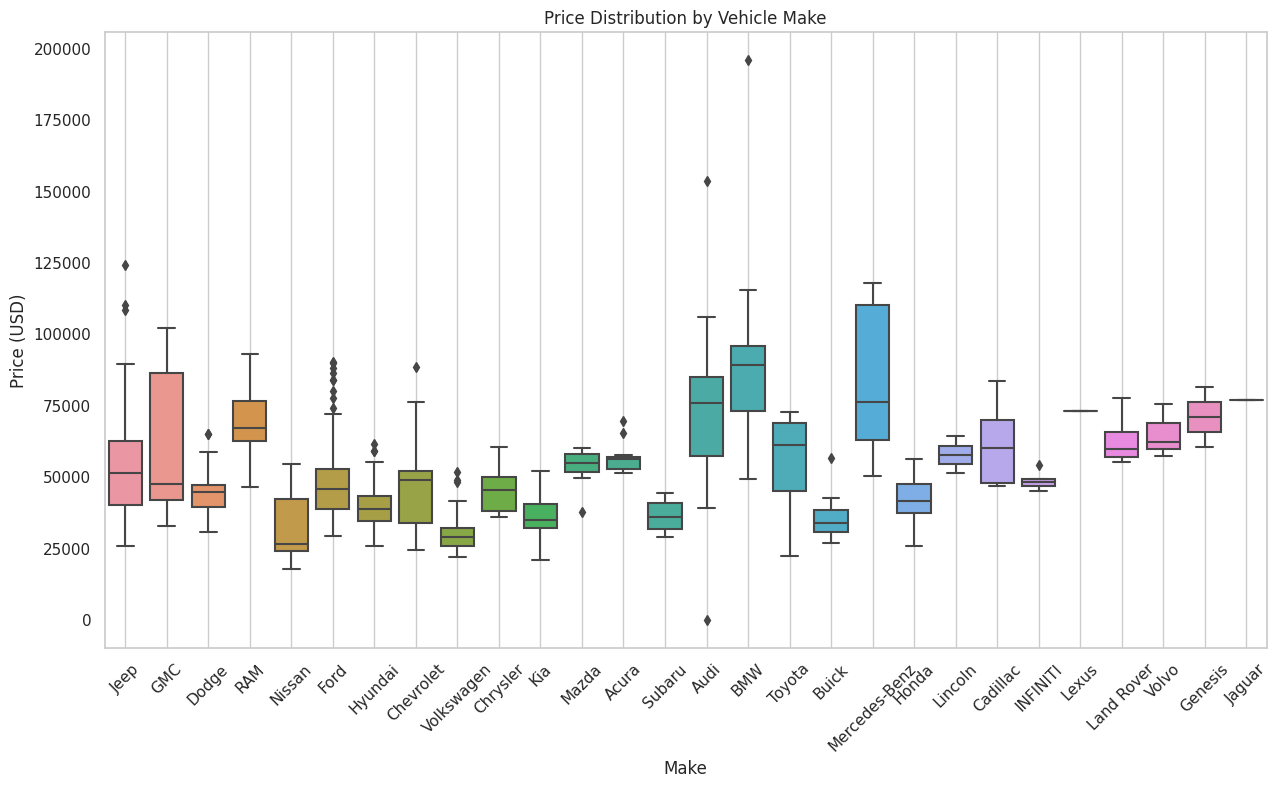

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 2. Mileage vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=data)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()

# 3. Price by Make
plt.figure(figsize=(15, 8))
sns.boxplot(x='make', y='price', data=data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Vehicle Make')
plt.xlabel('Make')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()


## Encoding Categorical Features

In [24]:
# Identify categorical columns
categorical_cols = ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']

# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the shape of the new DataFrame
print(data_encoded.shape)


(1002, 791)


## Splitting the data

In [25]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (801, 790)
X_test shape: (201, 790)
y_train shape: (801,)
y_test shape: (201,)


## Training the Model

In [49]:

param_grid_gb = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for training
    'max_features': ['1.0', 'sqrt', 'log2']
}

# Perform Grid Search with GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the model with the training data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search_gb.best_params_}")
print(f"Best R² Score: {grid_search_gb.best_score_}")

# Use the best model to predict on the test set
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)

# Calculate the MSE and R² score for the test set
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
[CV] END learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learnin

KeyboardInterrupt: 

## Model Evaluation

In [6]:
print(f"Gradient Boosting Regressor MSE: {mse_gb}")
print(f"Gradient Boosting Regressor R² Score: {r2_gb}")


Gradient Boosting Regressor MSE: 27891770.44014508
Gradient Boosting Regressor R² Score: 0.8989250613328307


In [6]:
import numpy as np



# 1. Standard deviation of actual car prices (y_test)
std_dev = np.std(y_test)
print(f"Standard Deviation of Actual Car Prices: {std_dev:.2f}")

# 2. Root Mean Squared Error (RMSE) from MSE
mse = 27891770.44014508  # Replace this with your calculated MSE if needed
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 3. Compare RMSE with standard deviation
if rmse > std_dev:
    print("RMSE is greater than the standard deviation, the model may not be performing well.")
else:
    print("RMSE is within a reasonable range compared to the standard deviation.")


Standard Deviation of Actual Car Prices: 16611.78
Root Mean Squared Error (RMSE): 5281.27
RMSE is within a reasonable range compared to the standard deviation.


## Saving the Model File

In [4]:
import joblib


filename = 'gradient_boosting_model.sav'
joblib.dump(grid_search_gb.best_estimator_, filename)

print(f"Model saved as {filename}")


Model saved as gradient_boosting_model.sav


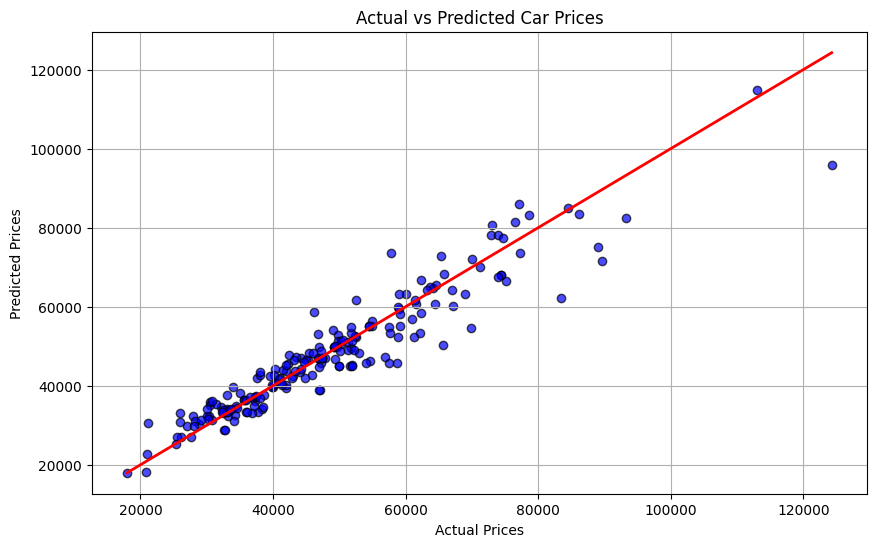

In [5]:
import joblib
import matplotlib.pyplot as plt

# Load the saved model from the file
filename = 'gradient_boosting_model.sav'
loaded_model = joblib.load(filename)


y_pred_loaded = loaded_model.predict(X_test)

# Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_loaded, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect predictions
plt.title("Actual vs Predicted Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()
